<a href="https://colab.research.google.com/github/waghashvini/Test/blob/master/GameWinnerPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## problem Statement
Task 1:-Prepare a complete data analysis report on the given pubg data.

Objective
The goal of this project is to predict the win probability of a player in a PUBG match using available match and player data. The target variable is winPlacePerc, a continuous variable ranging from 0 (worst) to 1 (best), representing the percentile rank of the player's final standing in the match.



In [ ]:
#import l
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("pubg.csv")
df = df.sample(frac=0.1, random_state=42)  # 10% random sample

In [ ]:

pd.set_option('display.max_column',None)

In [ ]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4283,66f747e2fddf89,43d37da533e607,8d1675190333bf,0,1,0.0,0,0,1,48,...,0.0,0.0,0.0,0.0,0.0,0.0,4426.000,3.0,0.0,0.7802
37693,12a16341db8184,a00298d671f298,58ea66b4c98b28,0,2,0.0,0,0,1,63,...,0.0,0.0,0.0,0.0,0.0,0.0,984.100,8.0,0.0,0.3846
7364,27a1d4b88dda6c,1fe1587f87148a,e949032bc7cb3b,0,3,112.8,1,1,1,33,...,3.0,0.0,0.0,0.0,0.0,0.0,616.100,3.0,1460.0,0.2308
27907,46b6e5887eccdb,947b6e145503e0,1fc70f9d2870ab,0,3,346.2,2,1,6,21,...,0.0,833.9,0.0,387.8,0.0,0.0,5624.000,5.0,0.0,0.8723
36857,e5ed0cf0eaf1e6,dad181b8728190,6b70df0e5495db,0,0,0.0,0,0,0,82,...,0.0,0.0,0.0,0.0,0.0,0.0,121.400,0.0,0.0,0.1852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6129,315fac78dbcb0d,0b9e71409ddc29,f26a48a4874478,0,0,90.3,0,0,0,90,...,0.0,0.0,0.0,0.0,0.0,0.0,37.160,1.0,1429.0,0.0532
37607,93419e17880be2,9887179e8755d5,91799665d1c656,0,0,249.0,2,1,0,23,...,0.0,0.0,0.0,0.0,0.0,0.0,32.810,1.0,1529.0,0.1071
505,27cbb966205e18,7c32f698fd0358,0f370fe752475d,0,0,0.0,0,0,0,88,...,0.0,0.0,0.0,0.0,0.0,0.0,9.319,0.0,0.0,0.0625
36379,7dfecf05348312,f3d75fdc5b2c29,e1a24a57abc0c6,0,0,79.0,1,0,0,29,...,0.0,0.0,0.0,0.0,0.0,0.0,2026.000,4.0,0.0,0.4400


In [ ]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4283,66f747e2fddf89,43d37da533e607,8d1675190333bf,0,1,0.0,0,0,1,48,...,0.0,0.0,0.0,0.0,0.0,0.0,4426.0,3.0,0.0,0.7802
37693,12a16341db8184,a00298d671f298,58ea66b4c98b28,0,2,0.0,0,0,1,63,...,0.0,0.0,0.0,0.0,0.0,0.0,984.1,8.0,0.0,0.3846
7364,27a1d4b88dda6c,1fe1587f87148a,e949032bc7cb3b,0,3,112.8,1,1,1,33,...,3.0,0.0,0.0,0.0,0.0,0.0,616.1,3.0,1460.0,0.2308
27907,46b6e5887eccdb,947b6e145503e0,1fc70f9d2870ab,0,3,346.2,2,1,6,21,...,0.0,833.9,0.0,387.8,0.0,0.0,5624.0,5.0,0.0,0.8723
36857,e5ed0cf0eaf1e6,dad181b8728190,6b70df0e5495db,0,0,0.0,0,0,0,82,...,0.0,0.0,0.0,0.0,0.0,0.0,121.4,0.0,0.0,0.1852


## Domain Analysis

The dataset contains over 4 million rows and includes:
1.   Player statistics (kills, walk distance, damage dealt, etc.)
2.   Match information (matchType, matchDuration)
3.   Group and team-level metrics

1) here above data speaks about pubg game

2) Id,groupID,matchID are ID's of each pubg match/group specifies number of matches played.

3) **DONOs** - Number of eneamy players knocked only but not killed

4) **assists** - a player tried to kill an enemy players but damaged them only that time and killed latter by teamment.

5) **Boosts**- a quantity of boosting items get used by players to get boost

6) **damageDealt**	- total damage dealt(total damage took place )

7) **headshotKills**	-eliminating an opponent by hitting them in the head with a bullet. This is a significant tactic because headshots often result in more damage compared to hitting the body, sometimes even twice as much.

8) **heals** -number of healing items used

9) **killPlace** -locations where players frequently engage in combat, often resulting in eliminations. These areas tend to have high loot density and attract many players, making them ideal for both finding weapons and getting into firefights.

10) **killPoint** -locations where players frequently engage in combat, often resulting in eliminations. These areas tend to have high loot density and attract many players, making them ideal for both finding weapons and getting into firefights.

11) **kills** -number of enemy players killed

12) **killStreaks** -the number of consecutive kills a player achieves without being eliminated.OR Max number of enemy players killed in a short amount of time.

13) **longestKill** -Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat

14) **matchDuration** -Duration of match in seconds.

15) **matchType** -String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

16) **maxPlace** -the total number of player groups or teams that participated in a match, according to Kaggle. It is used to calculate the winPlacePerc (winning placement percentage) attribute, which signifies the percentile ranking of a player within the match.

17) **numGroups** - Number of groups we have data for in the match.

18) **rankPoints** - Rank Points (RP) determine a player's rank within the competitive ranking system. RP is earned or lost based on performance in matches, with factors like survival time, kills, and match placement influencing the points gained.

19) **revives** -Number of times you revived your teammates.

20) **rideDistance** -Total distance traveled in vehicles (measured in meters).

21) **roadKills** -Number of enemy killed while travelling in a vehicle.

22) **swimDistance** -Total distance traveled by swimming (measured in meters).

23) **teamKills**- Number of times you are killed your teammate.

24) **vehicleDestroys**- Number of vehicles destroyed.

25) **walkDistance** - distance covered by walking.

26) **weaponsAcquired** -Number of weapons picked up.

27) **winPoints** -Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

28) **winPlacePerc**- The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


# Basic checks

In [ ]:
df.shape

(444697, 29)

In [ ]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4283,66f747e2fddf89,43d37da533e607,8d1675190333bf,0,1,0.0,0,0,1,48,...,0.0,0.0,0.0,0.0,0.0,0.0,4426.0,3.0,0.0,0.7802
37693,12a16341db8184,a00298d671f298,58ea66b4c98b28,0,2,0.0,0,0,1,63,...,0.0,0.0,0.0,0.0,0.0,0.0,984.1,8.0,0.0,0.3846
7364,27a1d4b88dda6c,1fe1587f87148a,e949032bc7cb3b,0,3,112.8,1,1,1,33,...,3.0,0.0,0.0,0.0,0.0,0.0,616.1,3.0,1460.0,0.2308
27907,46b6e5887eccdb,947b6e145503e0,1fc70f9d2870ab,0,3,346.2,2,1,6,21,...,0.0,833.9,0.0,387.8,0.0,0.0,5624.0,5.0,0.0,0.8723
36857,e5ed0cf0eaf1e6,dad181b8728190,6b70df0e5495db,0,0,0.0,0,0,0,82,...,0.0,0.0,0.0,0.0,0.0,0.0,121.4,0.0,0.0,0.1852


In [ ]:
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
6129,315fac78dbcb0d,0b9e71409ddc29,f26a48a4874478,0,0,90.3,0,0,0,90,...,0.0,0.0,0.0,0.0,0.0,0.0,37.160,1.0,1429.0,0.0532
37607,93419e17880be2,9887179e8755d5,91799665d1c656,0,0,249.0,2,1,0,23,...,0.0,0.0,0.0,0.0,0.0,0.0,32.810,1.0,1529.0,0.1071
505,27cbb966205e18,7c32f698fd0358,0f370fe752475d,0,0,0.0,0,0,0,88,...,0.0,0.0,0.0,0.0,0.0,0.0,9.319,0.0,0.0,0.0625
36379,7dfecf05348312,f3d75fdc5b2c29,e1a24a57abc0c6,0,0,79.0,1,0,0,29,...,0.0,0.0,0.0,0.0,0.0,0.0,2026.000,4.0,0.0,0.4400
15375,c047e2b263665e,5fb3a94f3033cb,7820672a187cbb,0,0,39.1,0,0,0,65,...,0.0,0.0,0.0,0.0,0.0,0.0,469.400,4.0,0.0,0.4375


In [ ]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
df.dtypes

,0
Id,object
groupId,object
matchId,object
assists,int64
boosts,int64
damageDealt,float64
DBNOs,int64
headshotKills,int64
heals,int64
killPlace,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99481 entries, 2555773 to 3190650
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   assists          99481 non-null  int64  
 1   boosts           99481 non-null  int64  
 2   damageDealt      99481 non-null  float64
 3   DBNOs            99481 non-null  int64  
 4   headshotKills    99481 non-null  int64  
 5   heals            99481 non-null  int64  
 6   killPlace        99481 non-null  int64  
 7   killPoints       99481 non-null  int64  
 8   kills            99481 non-null  int64  
 9   killStreaks      99481 non-null  int64  
 10  longestKill      99481 non-null  float64
 11  matchDuration    99481 non-null  int64  
 12  matchType        99481 non-null  int64  
 13  maxPlace         99481 non-null  int64  
 14  numGroups        99481 non-null  int64  
 15  rankPoints       99481 non-null  int64  
 16  revives          99481 non-null  int64  
 17  rideDista

In [ ]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000,444697.000000
mean,0.233067,1.102803,130.104275,0.656440,0.225934,1.366180,47.684824,503.401505,0.920512,0.542545,22.905471,1579.576012,44.550440,43.050079,893.869046,0.163597,604.827785,0.003697,4.495621,0.023857,0.008062,1149.443112,3.660760,604.703614,0.472073
std,0.588247,1.711498,169.911526,1.146075,0.596665,2.682449,27.458348,626.961683,1.551218,0.711275,50.933305,258.908709,23.845672,23.303449,736.466922,0.467500,1496.965782,0.080893,30.921229,0.166594,0.093337,1180.874857,2.467132,739.316470,0.307251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,152.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1367.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.100000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,83.720000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,1438.000000,30.000000,30.000000,1444.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,680.800000,3.000000,0.000000,0.458300
75%,0.000000,2.000000,184.900000,1.000000,0.000000,2.000000,71.000000,1170.000000,1.000000,1.000000,21.170000,1851.000000,49.000000,47.000000,1500.000000,0.000000,0.238700,0.000000,0.000000,0.000000,0.000000,1966.000000,5.000000,1495.000000,0.740700
max,13.000000,18.000000,5557.000000,39.000000,23.000000,57.000000,100.000000,2122.000000,55.000000,18.000000,1005.000000,2237.000000,100.000000,100.000000,5513.000000,19.000000,31500.000000,18.000000,2718.000000,4.000000,4.000000,13310.000000,81.000000,1998.000000,1.000000


In [ ]:
#searching for null values
df.isnull().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


In [ ]:
# in above check winPlacePrerc column has one null value so we will drop it
# find the missing rows and drop them.
#df[df.winPlacePerc.isnull()]
df[df["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [ ]:
df.drop(2744604,inplace =True)


In [ ]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [ ]:
df.nunique()

,0
Id,4241
groupId,4240
matchId,4040
assists,7
boosts,12
damageDealt,2166
DBNOs,11
headshotKills,8
heals,25
killPlace,99


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['matchType'].value_counts()

,count
matchType,
squad-fpp,1678
duo-fpp,960
squad,634
solo-fpp,461
duo,290
solo,188
normal-squad-fpp,17
crashfpp,9
normal-duo-fpp,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4241 entries, 4283 to 15375
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               4241 non-null   object 
 1   groupId          4241 non-null   object 
 2   matchId          4241 non-null   object 
 3   assists          4241 non-null   int64  
 4   boosts           4241 non-null   int64  
 5   damageDealt      4241 non-null   float64
 6   DBNOs            4241 non-null   int64  
 7   headshotKills    4241 non-null   int64  
 8   heals            4241 non-null   int64  
 9   killPlace        4241 non-null   int64  
 10  killPoints       4241 non-null   int64  
 11  kills            4241 non-null   int64  
 12  killStreaks      4241 non-null   int64  
 13  longestKill      4241 non-null   float64
 14  matchDuration    4241 non-null   int64  
 15  matchType        4241 non-null   object 
 16  maxPlace         4241 non-null   float64
 17  numGroups      

#These are nominal categorical values (no meaningful order). So we use One-Hot Encoding Because:
 -No natural order
 -Models like logistic regression, SVM, neural networks work better with one-hot
 -Safer and interpretable


In [ ]:
#One-Hot-Encoding
#df = pd.get_dummies(df, columns=['matchType'], prefix='mode')


In [ ]:
df.isnull().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


# EDA


<Axes: xlabel='matchId', ylabel='count'>

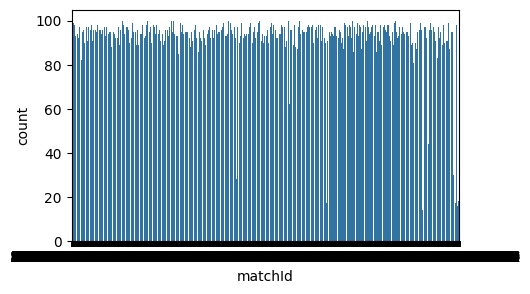

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['matchId'])

In [ ]:
df.groupby('matchId')['matchId'].count()

matchId
0000a43bce5eec     95
0000eb01ea6cdd     98
0002912fe5ed71     95
0003b92987589e    100
0006eb8c17708d     93
                 ... 
fffd74b5150cb4     97
fffe53015be300     97
fffe562611d981     94
fffe721f841f85     97
fffe92232706aa     93
Name: matchId, Length: 47964, dtype: int64

In [ ]:
# create new feature player_played

df['player_played']=df.groupby('matchId')['matchId'].transform('count')

In [ ]:
df['player_played']

0          96
1          91
2          98
3          91
4          97
           ..
4446961    94
4446962    93
4446963    98
4446964    94
4446965    98
Name: player_played, Length: 4446965, dtype: int64

In [ ]:
# create new feature player_group

df['player_group']=df.groupby('groupId')['groupId'].transform('count')

In [ ]:
#Drop Unnecessary Columns like Id, groupId, matchId are usually identifiers and not useful for prediction.
df.drop(['Id', 'groupId', 'matchId'], axis=1, inplace=True)

<Axes: xlabel='assists', ylabel='count'>

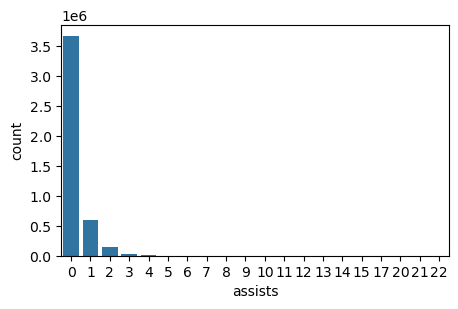

In [ ]:
# we will see distribution of each numaric column
plt.figure(figsize=(5,3))
sns.countplot(x=df['assists'])

## Preprocessing

In [ ]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
df['matchType'].value_counts()

matchType
squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create the encoder object
le = LabelEncoder()

# Apply label encoding to 'matchType' column
df['matchType'] = le.fit_transform(df['matchType']).astype(int)


In [ ]:
print(df['matchType'].dtype)

int64


<Axes: xlabel='walkDistance', ylabel='Count'>

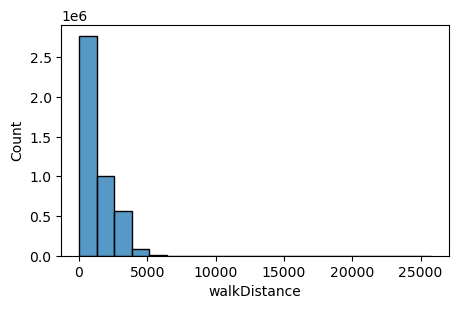

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(x=df['walkDistance'],bins=20)

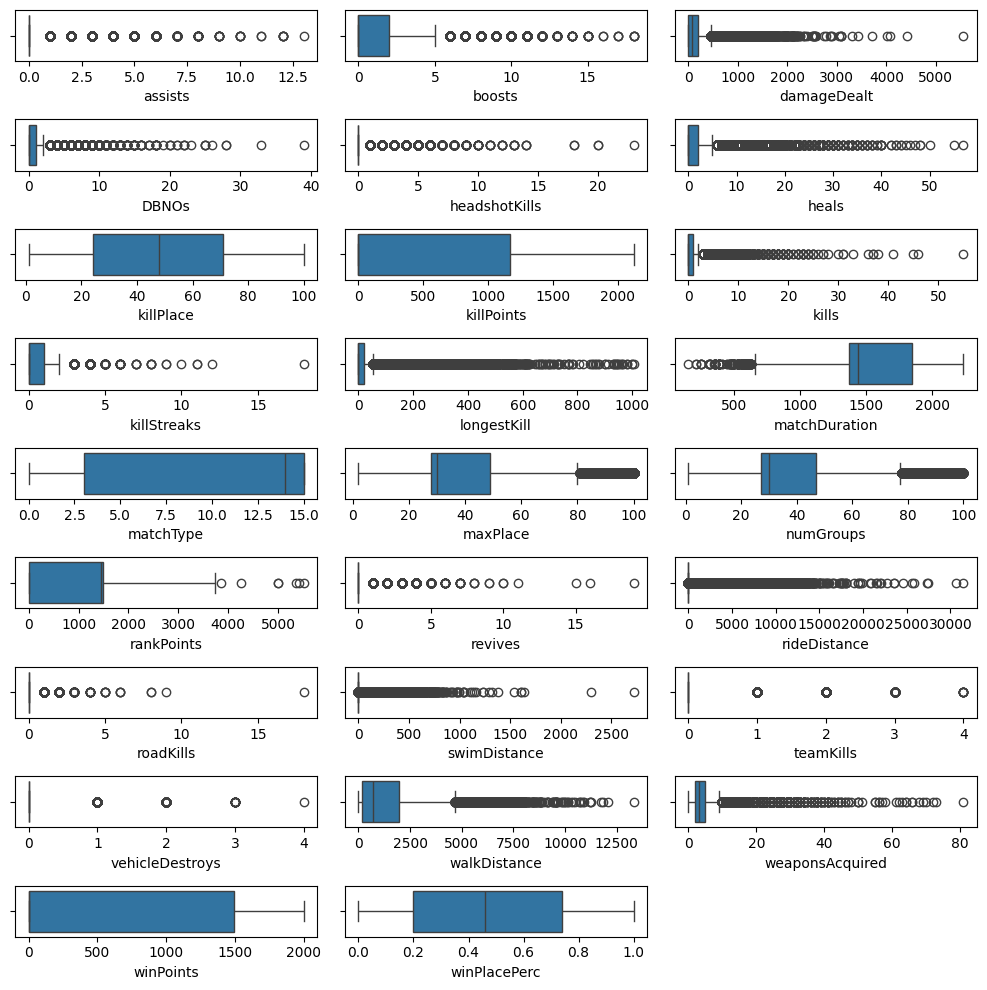

In [ ]:
# walkDistance is a Right skewed data outlier is there

plt.figure(figsize=(10,10))
plotnumber = 1

for i in df:
    if plotnumber <= 26:
        ax = plt.subplot(9,3,plotnumber)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()


In [ ]:
#from pandas_profiling import ProfileReport
#profile=ProfileReport(df,title="EDA",explorative=False)

In [ ]:
#profile

In [ ]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

#df = remove_outliers_iqr(df, 'kills')  # Apply on any column

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:#
    df = remove_outliers_iqr(df, col)  # Or use remove_outliers_iqr / replace_outliers_with_median

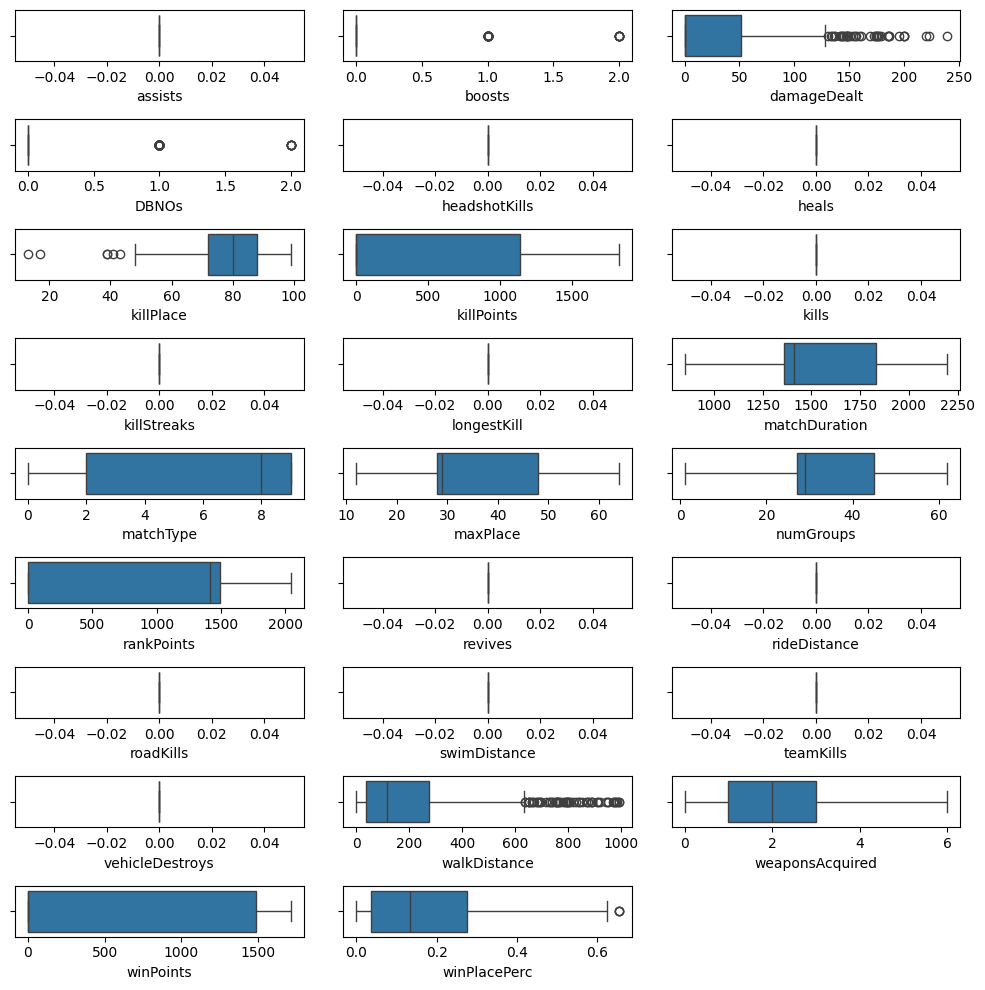

In [ ]:
# walkDistance is a Right skewed data outlier is there

plt.figure(figsize=(10,10))
plotnumber = 1

for i in df.drop(['Id', 'groupId', 'matchId'],axis=1):
    if plotnumber <= 26:
        ax = plt.subplot(9,3,plotnumber)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

<Axes: ylabel='Density'>

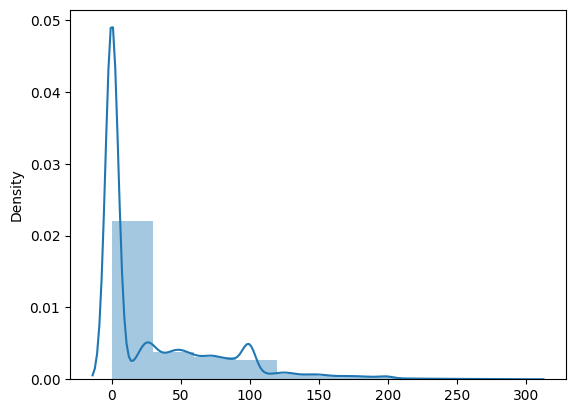

In [ ]:
sns.distplot(x=df['damageDealt'],bins=10)

In [ ]:
#finding correlation to select feature to train the model
# Compute correlation of all columns with 'winPlacePerc'
correlation_with_target = df.corr(numeric_only=True)['winPlacePerc'].sort_values(ascending=False)

print(correlation_with_target)

winPlacePerc       1.000000
walkDistance       0.585145
weaponsAcquired    0.462219
numGroups          0.158727
maxPlace           0.146138
boosts             0.143828
damageDealt        0.120331
DBNOs              0.057341
winPoints          0.021731
killPoints         0.014548
rankPoints        -0.008080
matchDuration     -0.125276
matchType         -0.127717
killPlace         -0.758408
assists                 NaN
headshotKills           NaN
heals                   NaN
kills                   NaN
killStreaks             NaN
longestKill             NaN
revives                 NaN
rideDistance            NaN
roadKills               NaN
swimDistance            NaN
teamKills               NaN
vehicleDestroys         NaN
Name: winPlacePerc, dtype: float64


In [ ]:
# Select features with absolute correlation >= 0.3 (excluding the target itself)
selected_features = correlation_with_target[correlation_with_target.abs() >= 0.3]
selected_features = selected_features.drop('winPlacePerc')  # drop target column


In [ ]:
# Print selected features and their correlation
print("Selected features with |correlation| >= 0.3:\n")
print(selected_features)



Selected features with |correlation| >= 0.3:

walkDistance       0.585145
weaponsAcquired    0.462219
killPlace         -0.758408
Name: winPlacePerc, dtype: float64


In [ ]:
# get just the column names for modeling
feature_names = selected_features.index.tolist()
print("\nFeature names to use in model:")
print(feature_names)


Feature names to use in model:
['walkDistance', 'weaponsAcquired', 'killPlace']


## model building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define features and target
X = df.drop(['winPlacePerc'], axis=1)
y = df['winPlacePerc']


In [ ]:
from sklearn.preprocessing import StandardScaler
# Optional: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
# 10. Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

MAE: 0.0348
R² Score: 0.8886


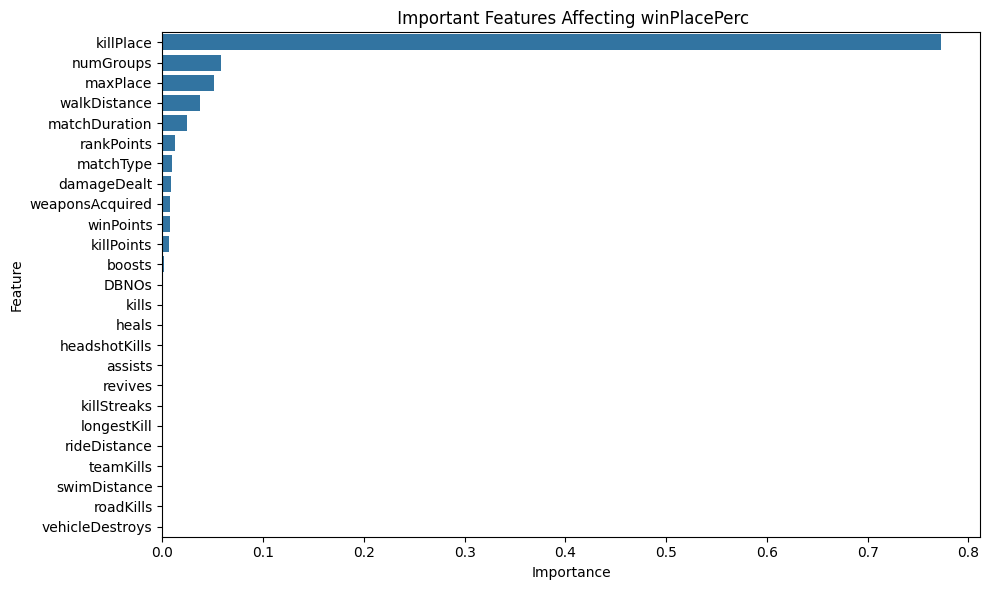

In [ ]:
# 11. Feature importance
importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot important features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title(' Important Features Affecting winPlacePerc')
plt.tight_layout()
plt.show()


In [ ]:
importances

array([0.        , 0.00174791, 0.00885559, 0.00200188, 0.        ,
       0.        , 0.8231278 , 0.00667919, 0.        , 0.        ,
       0.        , 0.0295311 , 0.00670818, 0.02499882, 0.04260871,
       0.01020401, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02790832, 0.00894054, 0.00668794])

In [ ]:
features

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression

#  Train Linear Regression Model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict
y_pred = model_linear.predict(X_test)

In [ ]:
#  Evaluate

mae_linear = mean_absolute_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

In [ ]:


# 10. View Coefficients (Feature Importance in Linear Regression)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_linear.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 10 Most Influential Features (Linear Regression):")
print(coef_df)


Top 10 Most Influential Features (Linear Regression):
            Feature   Coefficient
14        numGroups  2.467679e-01
13         maxPlace -1.362595e-01
6         killPlace -1.172286e-01
12        matchType  8.797602e-02
22     walkDistance  2.459271e-02
15       rankPoints  1.697021e-02
24        winPoints  1.232669e-02
11    matchDuration -9.410333e-03
7        killPoints  5.191574e-03
23  weaponsAcquired  3.074504e-03
1            boosts  1.549229e-03
2       damageDealt -1.214120e-03
3             DBNOs  3.443655e-04
10      longestKill -1.110223e-16
9       killStreaks -8.326673e-17
4     headshotKills -5.898060e-17
5             heals -4.857226e-17
8             kills -2.775558e-17
17     rideDistance -3.065340e-46
16          revives  1.313717e-46
18        roadKills  1.094764e-47
20        teamKills -2.917038e-62
21  vehicleDestroys  1.944692e-62
0           assists  0.000000e+00
19     swimDistance  0.000000e+00


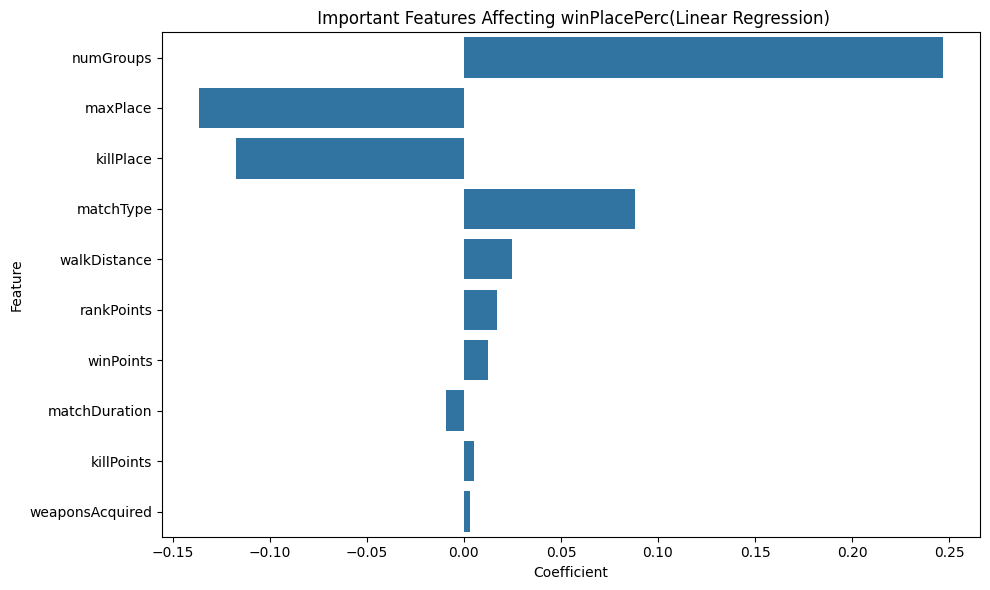

In [ ]:
# Plot important features
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
plt.title(' Important Features Affecting winPlacePerc(Linear Regression)')
plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# 8. Train XGBoost Regressor
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# 9. Predictions and Evaluation
y_pred = model_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred)
r2_xgb= r2_score(y_test, y_pred)

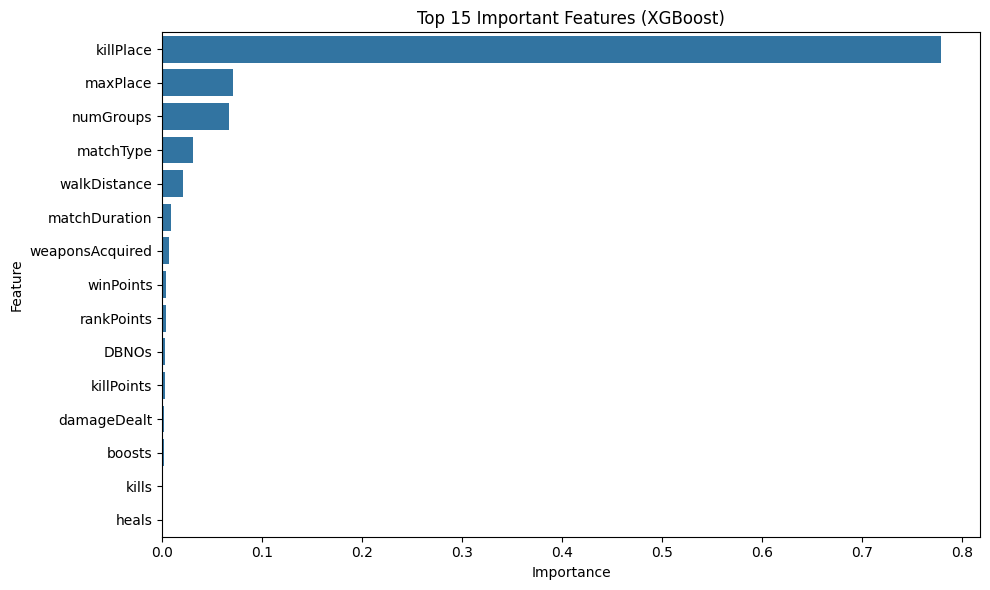

In [ ]:

# 10. Feature Importance Plot
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Important Features (XGBoost)')
plt.tight_layout()
plt.show()


Here is a complete performance report comparing multiple models on the PUBG dataset (with 10% sampling). This report includes metrics, feature insights, and a final recommendation on the best model for production.

PUBG Win Probability Prediction – Model Comparison Report


*   Objective

  To predict the winPlacePerc (win probability) of PUBG players using various machine learning models and identify the most important factors affecting it.
*   Data Preprocessing Summary
  Used 10% random sample of the PUBG dataset to reduce memory usage
  1. Removed: Id, groupId, matchId
  2. Dropped rows with null values
  3. Encoded matchType as numeric
  4. Scaled features using StandardScaler  






**Model performance evaluation**

In [ ]:
print("Linear Regression Performance:")
print(f"MAE: {mae_linear:.4f}")
print(f"R² Score: {r2_linear:.4f}\n")

print("XGBRegressor Performance:")
print(f"MAE: {mae_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")

print("\nRandom forest Performance")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Linear Regression Performance:
MAE: 0.0479
R² Score: 0.7737

XGBRegressor Performance:
MAE: 0.0340
R² Score: 0.8942

Random forest Performance
MAE: 0.0340
R² Score: 0.8942


As per above RandomForestRegressor & XGBRegressor models are Best Model




for Production  

 challenges I faced on data and what technique used with proper reason.


1.   Actually I dont have domain knoledge of PUBG game so searched on internet about it
2.   Due to large dataset model not get loaded so I divided dataset in to samples of 10% data samples randomly
3. on my systems jupiternotebook model not get loded properly means it tooks toomuch time so I used Google colab  


* I would like to ask one question -If we dont understand dataset then what to do? how to descide feature engginering